## User Instructions
This is a program which will create R-Maps. These are used to correlate a voxel to a continuous outcome measure.
As it stands, this software employs Pearson Correlation Coefficients, which imply it will be best to have a continuous outcome on a percent scale. If you would like to do otherwise, a Spearman Correlation is possible. 

The software will walk you through everything. 

Files are expected to follow a BIDS naming convention. 
Subject IDs are expected in the input CSV and are expected to share the same naming convention as the nifti files themselves.

In [94]:
import pandas as pd
import numpy as np
from calvin_utils.import_functions import paths_to_input_files
# What is the path to the folder/csv containing the nifti files/files paths for the neuroimaging files?
path_1 = '/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/BIDS_Dataset'

# What is the path to the csv with your outcome measures? Please note:
## This software expects csv to contain an outcome in a column with subject names in another column.
path_2 = '/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/Study_Metadata/Behavior_FactorAnalysis_week.csv'

# What is would you like to call this analysis? 
## This will generate a subfolder called analysis_name at the location of path_1 and save all outputs there.
analysis_name = 'corbetta_analysis'

#----------------------------------------------------------------User Input Above----------------------------------------------------------------
path_1, path_2, out_dir = paths_to_input_files(
    path_1 = path_1,
    path_2 = path_2,
    analysis_name = analysis_name
)

I will save to: /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/default_analysis


In [95]:
import os
from calvin_utils.import_matrices import import_matrices_from_folder, csv_of_nifti_filepaths_to_dataframe

#Do you want to import from folder or csv?
import_choice = 'folder'

#----------------------------------------------------------------
if import_choice == 'folder':
    df_1 = import_matrices_from_folder(path_1, file_pattern='/*/*/*stat-t_conn.nii*')
elif import_choice == 'csv':
    df_1 = csv_of_nifti_filepaths_to_dataframe(path_1)
else:
    raise ValueError('Unexpected import choice: %s' % import_choice)
df_1 = df_1.transpose()

I will search:  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/BIDS_Dataset/*/*/*stat-t_conn.nii*


In [96]:
path_list = df_1.index.to_list()
basename_path_list = [os.path.basename(path).split('_')[0] for path in path_list]
df_1['subject'] = basename_path_list
df_1

0    1    2    3    4    5    6    7    8    9  ...  902620  902621  \
026  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
043  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
044  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
072  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...     ...   
038  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
053  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
098  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
062  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
065  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   

     902622  902623  902624  902625  902626  902627  902628  subject  
026     0.0     0.0     0.0     0.0     0.0     0.0     0.0      026  
088     0.0     0.0     0.0     0.0     0.0     0.0     0.0      088  
043     0.0     0.0     0.0     0.0     0.0     0.0     0.0      043  
044     0.0     0.0     0.0     0.0     0.0     0.0     0.0      044  
072     0.0     0.0     0.0     0.0     0.0     0.0     0.0      072  
..      ...     ...     ...     ...     ...     ...     ...      ...  
038     0.0     0.0     0.0     0.0     0.0     0.0     0.0      038  
053     0.0     0.0     0.0     0.0     0.0     0.0     0.0      053  
098     0.0     0.0     0.0     0.0     0.0     0.0     0.0      098  
062     0.0     0.0     0.0     0.0     0.0     0.0     0.0      062  
065     0.0     0.0     0.0     0.0     0.0     0.0     0.0      065  

[135 rows x 902630 columns]

In [97]:
# Import a CSV with the clinical data of interest
df_2 = pd.read_csv(path_2)
df_2

study_id  Language  MotorL  MotorR  AttentionVF  AttentionAve  \
0    FCS_024   -2.3822     NaN     NaN      -2.9237       -0.2572   
1    FCS_025       NaN     NaN     NaN          NaN           NaN   
2    FCS_026    0.4098     NaN     NaN       0.8293       -1.0631   
3    FCS_027   -2.2827     NaN     NaN       0.4972       -0.9441   
4    FCS_028       NaN     NaN     NaN          NaN           NaN   
..       ...       ...     ...     ...          ...           ...   
168  FCS_192   -3.2569  0.7975  0.5861          NaN           NaN   
169  FCS_193    0.7302  0.6155 -0.4802       0.2607        0.6090   
170  FCS_194   -2.9641 -0.4978 -2.8667          NaN           NaN   
171  FCS_195    0.5864 -2.3491  0.0868          NaN           NaN   
172  FCS_196    0.6699  0.4334 -0.4434       0.3186        0.5573   

     AttentionValDis  MemoryS  MemoryV  Motor_IC  ...  Language_W2  \
0             0.8242      NaN      NaN       NaN  ...       1.3764   
1                NaN      NaN      NaN       NaN  ...          NaN   
2            -0.4577      NaN      NaN       NaN  ...       0.4190   
3             0.2406      NaN      NaN       NaN  ...       0.4234   
4                NaN      NaN      NaN       NaN  ...          NaN   
..               ...      ...      ...       ...  ...          ...   
168              NaN      NaN      NaN    0.8521  ...      -2.3366   
169          -0.0414   0.9896   1.2775    0.2372  ...      -0.6949   
170              NaN      NaN      NaN   -1.7035  ...      -0.7164   
171              NaN  -1.2845   0.4588   -1.7040  ...      -0.1320   
172           0.3310   0.4851   0.7808    0.3529  ...      -0.5551   

     Attention_IC_VF  Attention_IC2  Attention_IC3  Group1  Group2  Group3  \
0            -2.3983        -1.0733         0.6471     NaN     NaN     NaN   
1                NaN            NaN            NaN     NaN     NaN     NaN   
2            -0.6535         0.5219        -0.5082     NaN     NaN     NaN   
3             0.0392         0.0474        -1.6694     NaN     NaN     NaN   
4                NaN            NaN            NaN     NaN     NaN     NaN   
..               ...            ...            ...     ...     ...     ...   
168              NaN            NaN            NaN     NaN     NaN     NaN   
169           0.6355        -0.1315        -0.2397  1.1814  0.3105 -0.8401   
170              NaN            NaN            NaN     NaN     NaN     NaN   
171              NaN            NaN            NaN     NaN     NaN     NaN   
172           0.5945        -0.1507         0.2048  0.7454  0.1953 -0.5723   

     VisualL  VisualR  Visual_IC  
0        NaN      NaN        NaN  
1        NaN      NaN        NaN  
2        NaN      NaN        NaN  
3        NaN      NaN        NaN  
4        NaN      NaN        NaN  
..       ...      ...        ...  
168  -1.0417 -21.2143   -20.1726  
169  -1.1786  -1.7917    -0.6131  
170      NaN      NaN        NaN  
171      NaN      NaN        NaN  
172  -2.0714  -2.7560    -0.6845  

[173 rows x 21 columns]

In [98]:
import os
# What is the name of the column that contains your subject labels?
subject_column = 'study_id'
# What you should see below is a dataframe with subjects as rows, clinical outcome/data in the first columns, and then voxel values thereafter.
column_to_merge_on = 'AttentionVF'
#----------------------------------------------------------------Input Above----------------------------------------------------------------
path_list = df_2.loc[:, subject_column].to_list()
try:
    basename_path_list = [os.path.basename(path).split('_')[1] for path in path_list]
except:
    basename_path_list = [str(path) for path in path_list]
df_2['subject'] = basename_path_list
df_2['subject']

0      024
1      025
2      026
3      027
4      028
      ... 
168    192
169    193
170    194
171    195
172    196
Name: subject, Length: 173, dtype: object

In [99]:
# Let's take a look at some descriptive statistics
df_2.describe().transpose()

count          mean       std      min       25%      50%  \
Language         124.0 -1.612903e-06  0.999999  -3.2815 -0.127975  0.39785   
MotorL           117.0  8.547009e-07  0.999999  -2.3590 -0.175800  0.37630   
MotorR           117.0  2.564103e-06  1.000004  -2.8837 -0.218700  0.39080   
AttentionVF      100.0 -1.000000e-06  1.000002  -4.8475  0.042000  0.21070   
AttentionAve     100.0 -1.000000e-06  0.999998  -3.8381 -0.171825  0.29780   
AttentionValDis  100.0  1.776357e-17  1.000002  -6.0373 -0.196100  0.14375   
MemoryS           97.0 -1.030928e-06  0.999997  -2.5185 -0.726700  0.19350   
MemoryV           97.0  4.123711e-06  0.999994  -1.8261 -0.805500 -0.02680   
Motor_IC         117.0 -8.547009e-07  0.999992  -1.7049 -1.074000  0.35290   
Language_W1      124.0 -2.419355e-06  0.999999  -3.3557 -0.096600  0.39855   
Language_W2      124.0  7.162729e-18  1.000000  -3.0119 -0.527475 -0.16260   
Attention_IC_VF  100.0  0.000000e+00  0.999998  -5.2782 -0.271825  0.35490   
Attention_IC2    100.0 -2.000000e-06  1.000001  -1.7421 -0.291125 -0.12625   
Attention_IC3    100.0  1.000000e-06  0.999996  -2.9235 -0.485100  0.09930   
Group1            66.0  6.060606e-06  1.000002  -3.1783 -0.747025  0.22150   
Group2            66.0 -1.515152e-06  0.999998  -5.1440 -0.222500  0.25505   
Group3            66.0  6.060606e-06  0.999997  -4.9326 -0.318225  0.26790   
VisualL           79.0 -5.281644e+00  6.918854 -30.0833 -4.473250 -2.48810   
VisualR           79.0 -3.732158e+00  3.847680 -21.2143 -3.797600 -2.42560   
Visual_IC         79.0 -3.826233e+00  7.072219 -28.7024 -4.159250 -0.77980   

                      75%     max  
Language         0.626325  0.9445  
MotorL           0.629100  1.1906  
MotorR           0.585000  1.1934  
AttentionVF      0.388150  2.1223  
AttentionAve     0.595150  2.2230  
AttentionValDis  0.485325  2.1666  
MemoryS          0.658100  1.7800  
MemoryV          0.816500  1.7473  
Motor_IC         0.863600  1.3889  
Language_W1      0.618475  0.9281  
Language_W2      0.296925  3.4213  
Attention_IC_VF  0.615925  0.9948  
Attention_IC2    0.004250  6.1482  
Attention_IC3    0.435450  3.7075  
Group1           0.802950  1.8801  
Group2           0.541625  1.1165  
Group3           0.565725  1.2769  
VisualL         -1.910750 -0.9107  
VisualR         -1.614600 -0.7193  
Visual_IC        0.090800  4.2679

In [100]:
# Now, join voxels to the clinical data

#----------------------------------------------------------------
prep_df = df_2.copy()
final_df = df_2.loc[:, [column_to_merge_on, 'subject']].merge(df_1, on='subject', right_index=False)
merged_df = final_df.set_index('subject')
display(merged_df)

AttentionVF    0    1    2    3    4    5    6    7    8  ...  \
subject                                                            ...   
024          -2.9237  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
026           0.8293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
027           0.4972  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
029           0.8530  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
030          -4.4412  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
192              NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
193           0.2607  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
194              NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
195              NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
196           0.3186  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

         902619  902620  902621  902622  902623  902624  902625  902626  \
subject                                                                   
024         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
026         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
027         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
029         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
030         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
192         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
193         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
194         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
195         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
196         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         902627  902628  
subject                  
024         0.0     0.0  
026         0.0     0.0  
027         0.0     0.0  
029         0.0     0.0  
030         0.0     0.0  
...         ...     ...  
192         0.0     0.0  
193         0.0     0.0  
194         0.0     0.0  
195         0.0     0.0  
196         0.0     0.0  

[135 rows x 902630 columns]

In [101]:
# Enter the names of any columns you would like to remove from your dataframe below.
# If you do not want to remove columns, leave as columns_to_remove = None
# If you want to remove columns from the dataframe, leave as columns_to_remove = ['colulmn_1_name', 'colulmn_2_name', etc.]

columns_to_remove = None

#----------------------------------------------------------------User Inputs----------------------------------------------------------------
final_df = merged_df.copy()

#Remove undesirable columns
try:
    final_df = final_df.dropna()
    final_df.pop(columns_to_remove)
except:
    print('Soft error raised: could not find column %s:' % columns_to_remove)
display(final_df)

Soft error raised: could not find column None:


AttentionVF    0    1    2    3    4    5    6    7    8  ...  \
subject                                                            ...   
024          -2.9237  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
026           0.8293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
027           0.4972  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
029           0.8530  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
030          -4.4412  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
187           0.1583  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
188           0.6839  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
190           0.1485  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
193           0.2607  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
196           0.3186  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

         902619  902620  902621  902622  902623  902624  902625  902626  \
subject                                                                   
024         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
026         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
027         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
029         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
030         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
187         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
188         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
190         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
193         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
196         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         902627  902628  
subject                  
024         0.0     0.0  
026         0.0     0.0  
027         0.0     0.0  
029         0.0     0.0  
030         0.0     0.0  
...         ...     ...  
187         0.0     0.0  
188         0.0     0.0  
190         0.0     0.0  
193         0.0     0.0  
196         0.0     0.0  

[100 rows x 902630 columns]

In [102]:
from calvin_utils.network_mapping_utilities import generate_r_map
r_df, p_df, r_squared_df = generate_r_map(final_df, mask_path=None)

No mask path specified, using default mask data
Dataframe has been masked such that shape is:  (100, 225222)


100%|██████████| 225222/225222 [00:29<00:00, 7519.07it/s]


No mask path specified, using default mask data
Dataframe has been masked such that shape is:  (902629,)
No mask path specified, using default mask data
Dataframe has been masked such that shape is:  (902629,)


(91, 109, 91)
(902629, 1)
Image saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/default_analysis/r_map/AttentionVF



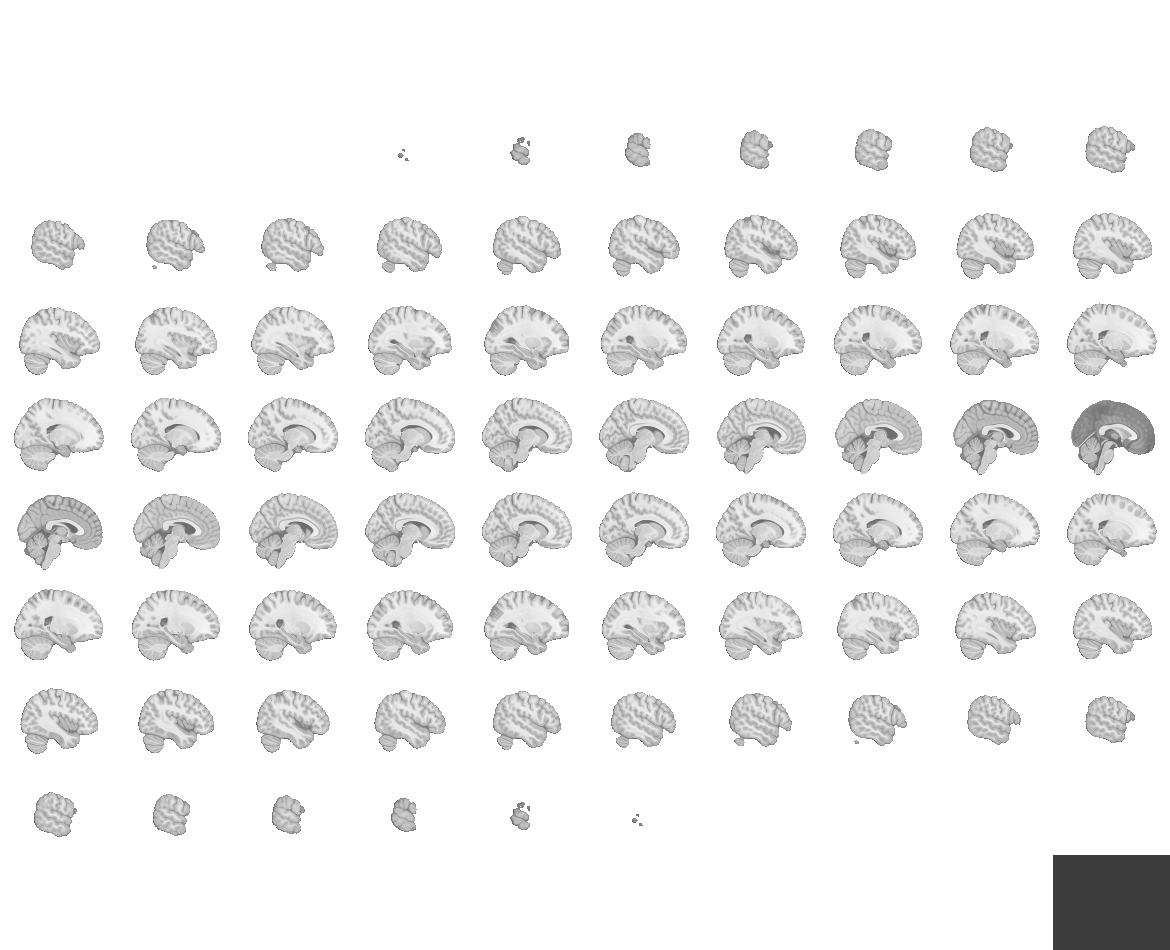
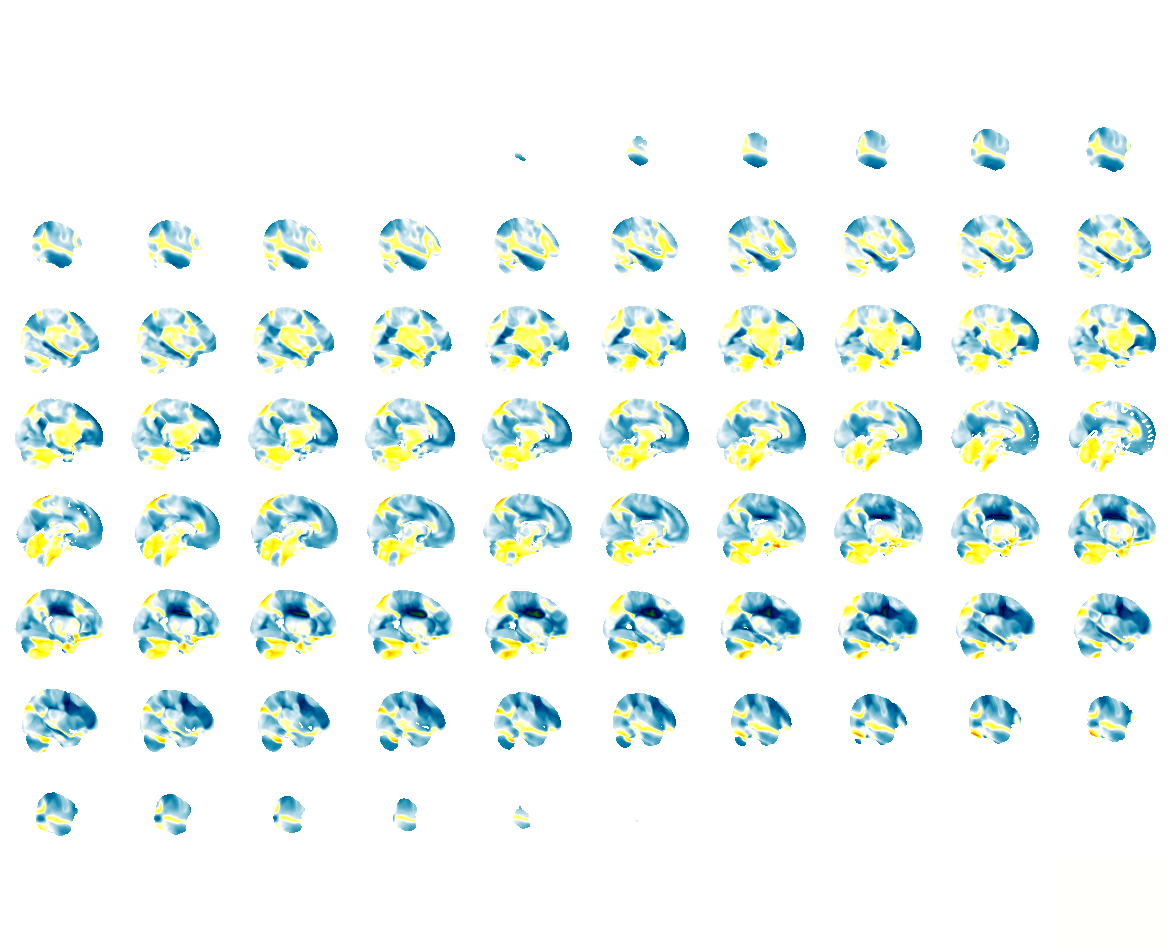

In [103]:
from calvin_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(r_df, (out_dir+f'/r_map/{column_to_merge_on}'))

(91, 109, 91)
(902629, 1)
Image saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/default_analysis/p_map/AttentionVF



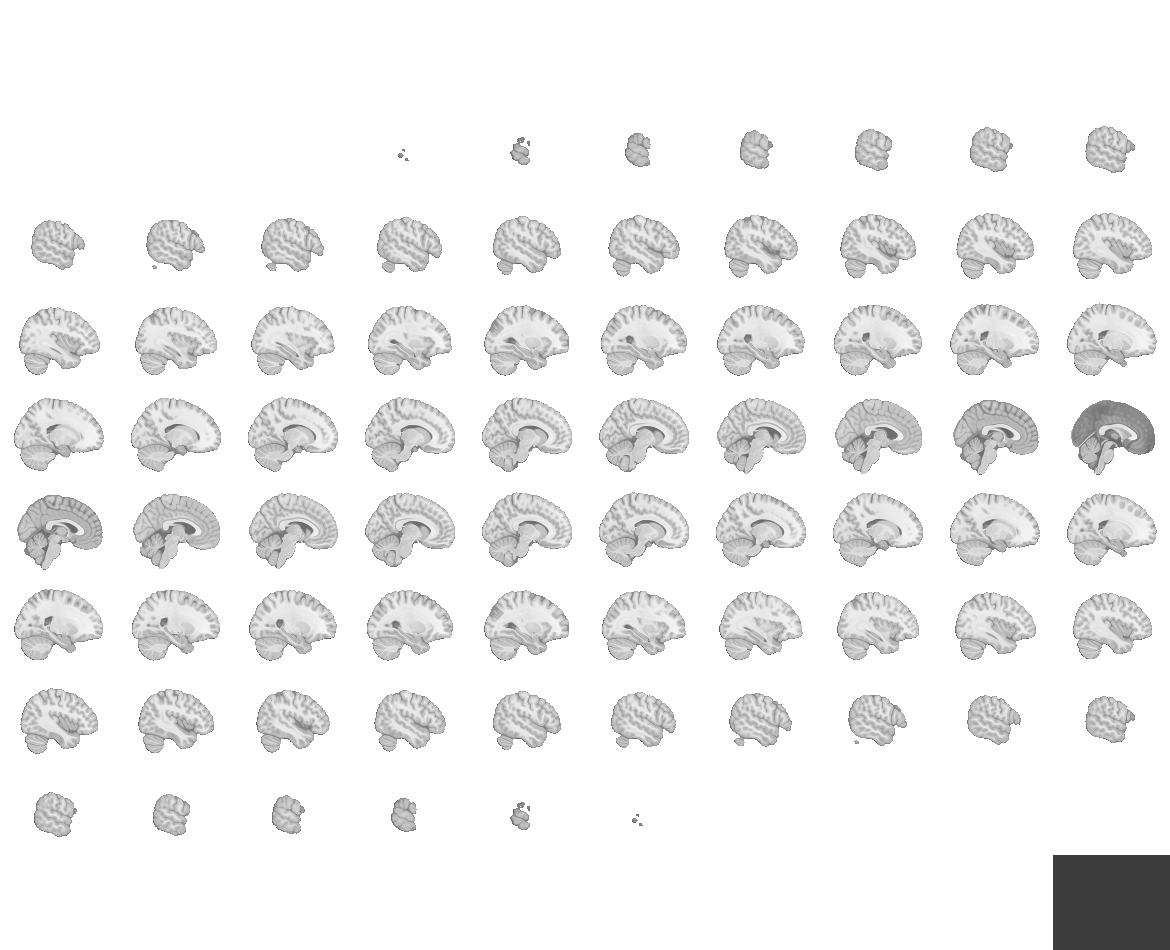
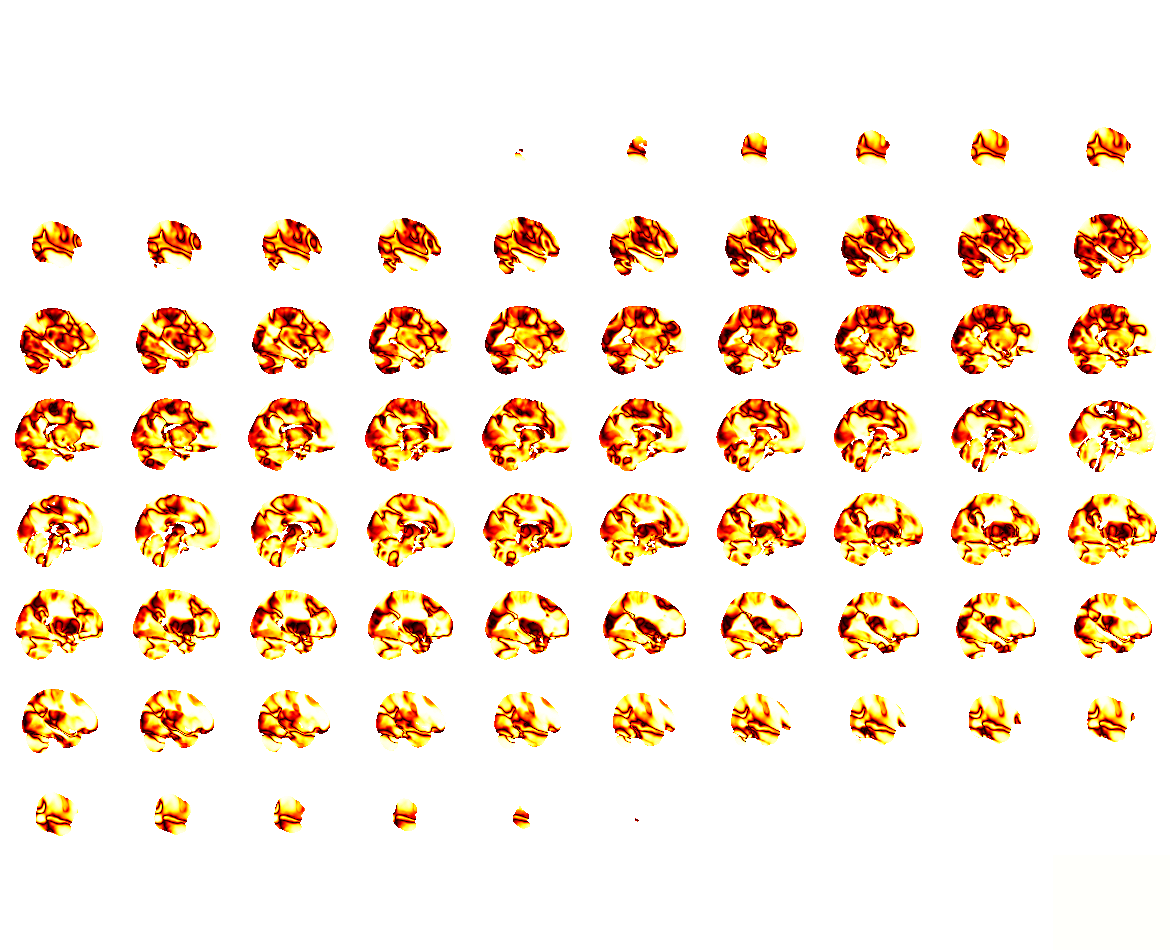

In [104]:
from calvin_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(p_df, (out_dir+f'/p_map/{column_to_merge_on}'))

(91, 109, 91)
(902629, 1)
Image saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/corbetta/default_analysis/r_squared_map/AttentionVF



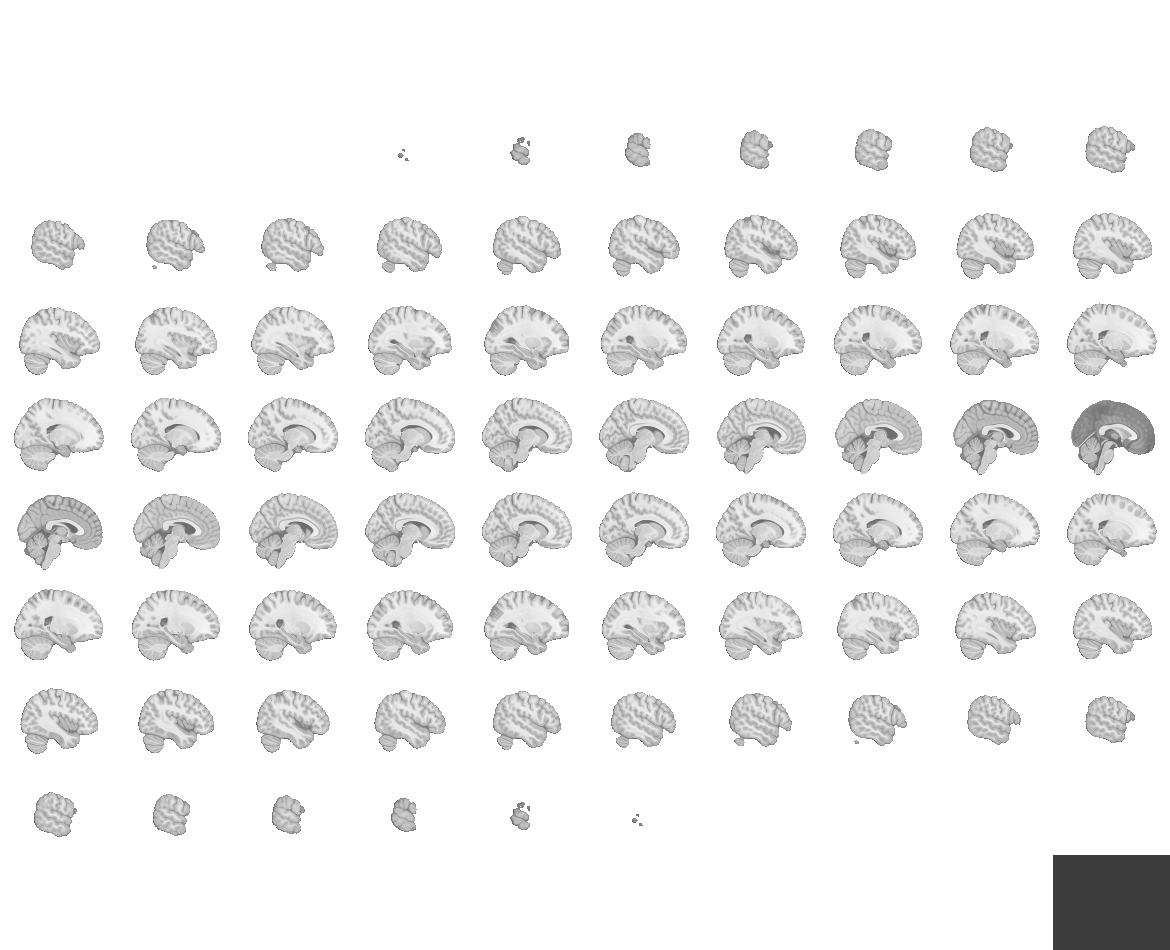
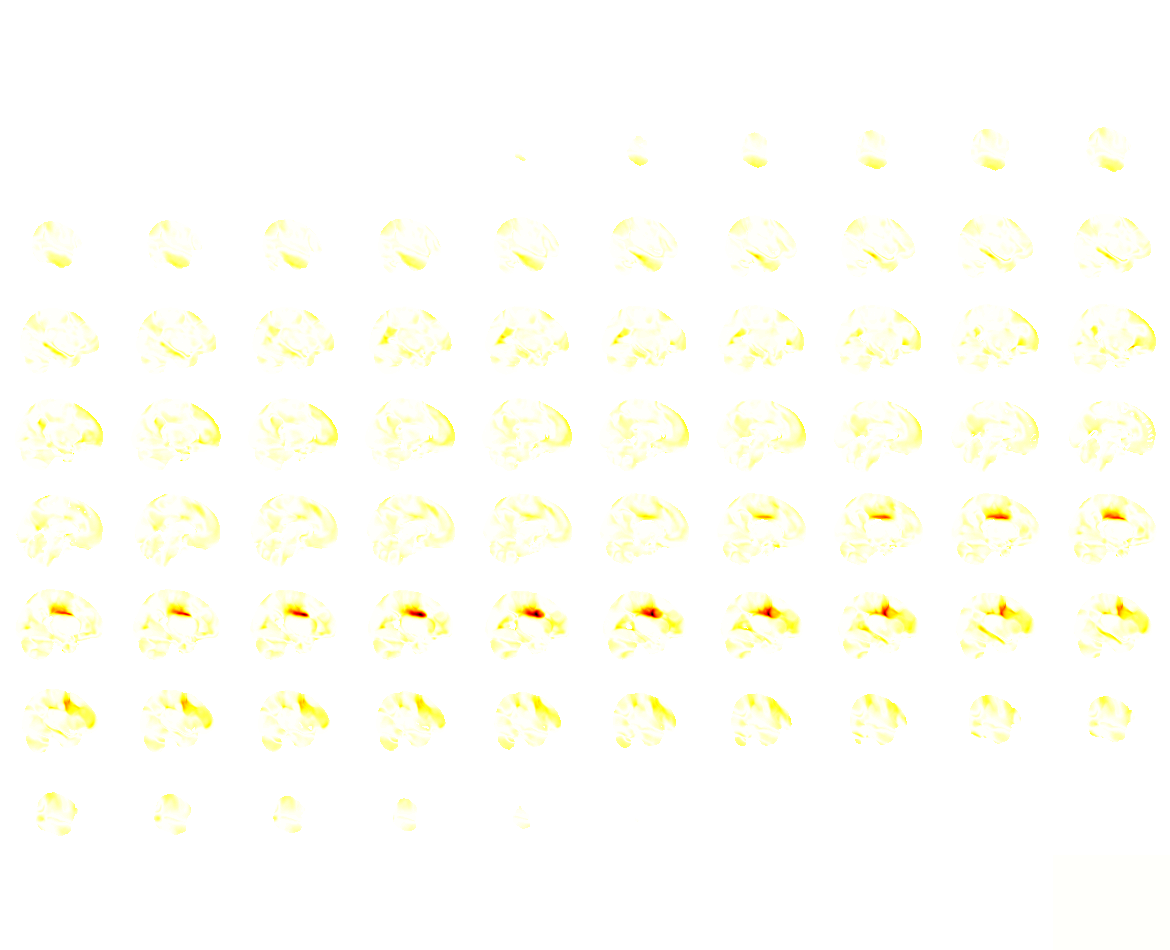

In [105]:
from calvin_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(r_squared_df, (out_dir+f'/r_squared_map/{column_to_merge_on}'))

## Perform Delta R-Map and Permute it for Significance

## Calculate the Observed Delta-R Map Between 2 Populations

In [106]:
from calvin_utils.network_mapping_utilities import generate_delta_r_map
delta_matrix = merged_df.copy()
observed_delta_r_map = generate_delta_r_map(delta_matrix, threshold_of_interest=65, column_of_interest='Age at DOS')

KeyError: 'Age at DOS'

(91, 109, 91)
(902629, 1)
Image saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/age_adjusted_r_maps/all_comers/over_vs_under_65_delta_r_map



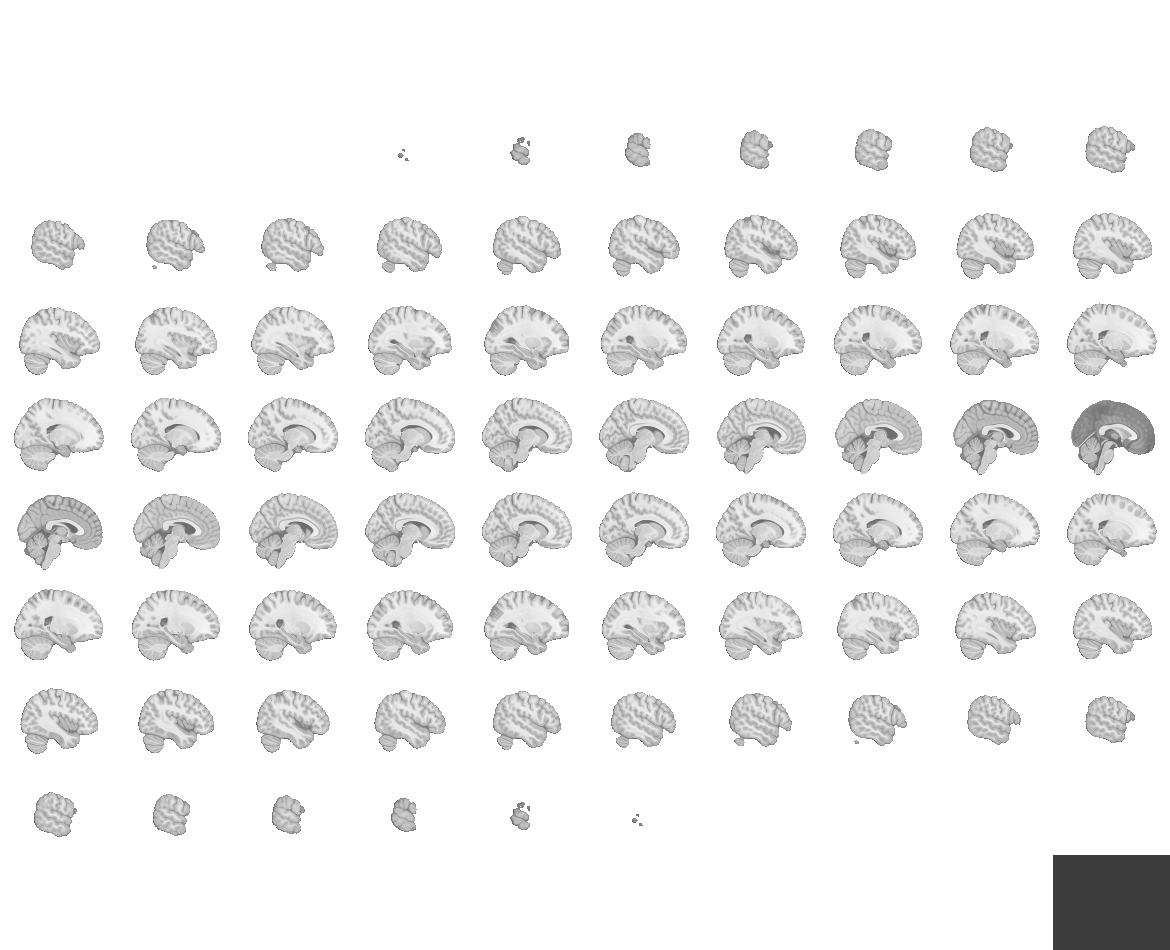
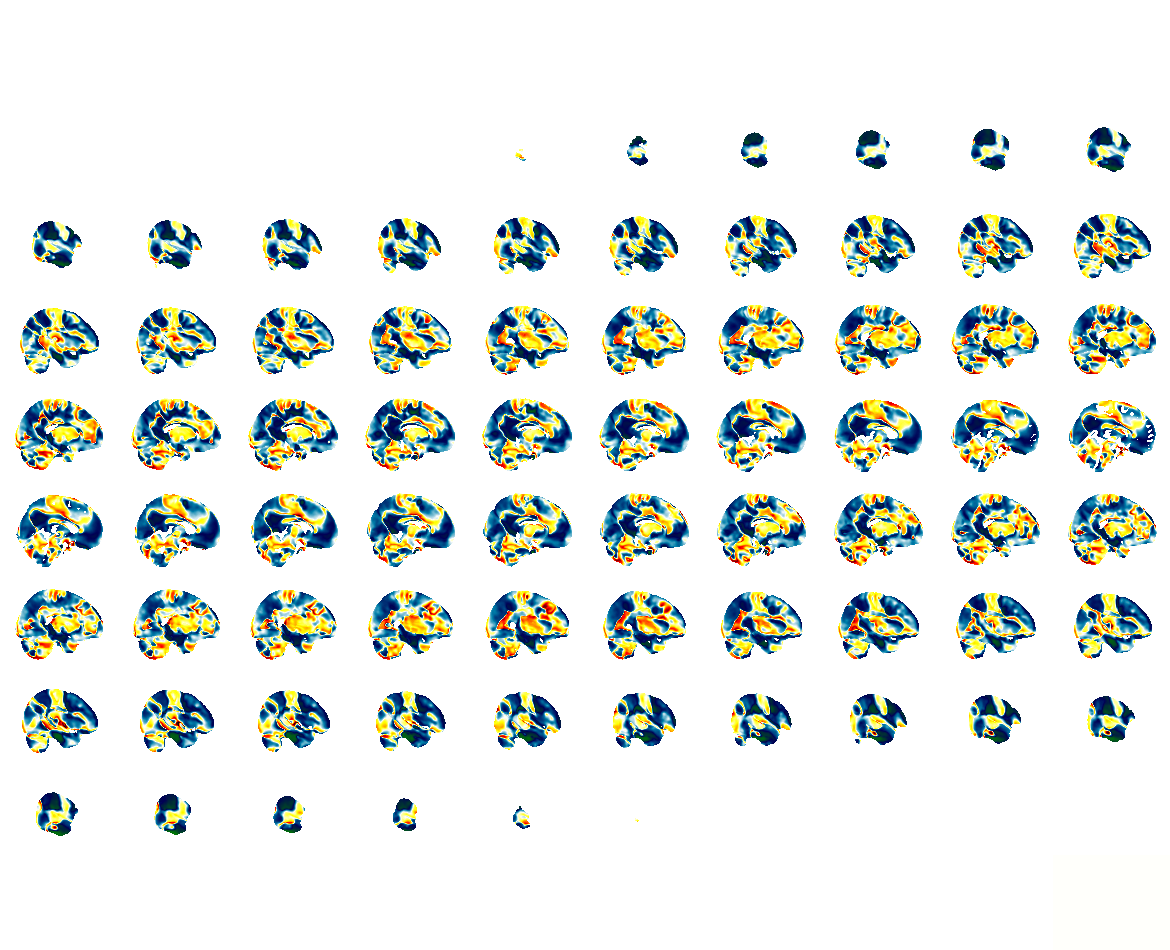

In [ ]:
from calvin_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(observed_delta_r_map, (out_dir+'/over_vs_under_65_delta_r_map'))

## Calculate the Empiric Delta-R Map Distribution 
### Note, this permutes the label of the population without permuting the neuroimaging data.
### Therefore, we are testing if the separation of the r-maps is significantly due to the variable of interest. 

In [ ]:
from calvin_utils.network_mapping_utilities import permuted_patient_label_delta_r_map
from calvin_utils.print_suppression import HiddenPrints
n_permutations = 2
column_of_interest = 'Age at DOS'
threshold_of_interest = 65
with HiddenPrints():
    p_count_df = permuted_patient_label_delta_r_map(dataframe_to_permute=merged_df, 
                                                observed_delta_r_map=observed_delta_r_map, 
                                                column_of_interest=column_of_interest, 
                                                threshold_of_interest=threshold_of_interest, 
                                                n_permutations=n_permutations)

100%|██████████| 225222/225222 [00:25<00:00, 8929.93it/s]


(91, 109, 91)
(902629, 1)
Image saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/age_adjusted_r_maps/all_comers/over_vs_under_65_delta_r_map_p_values_df



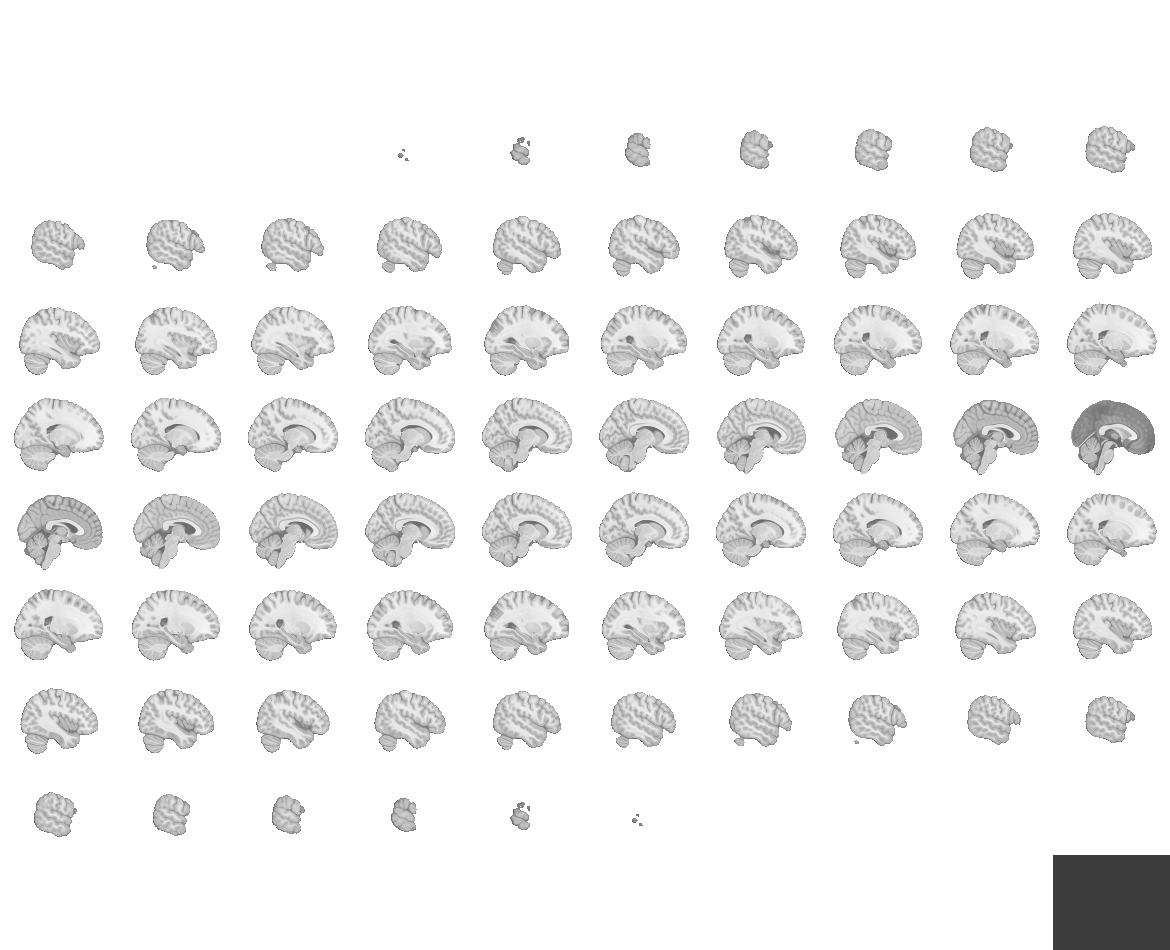
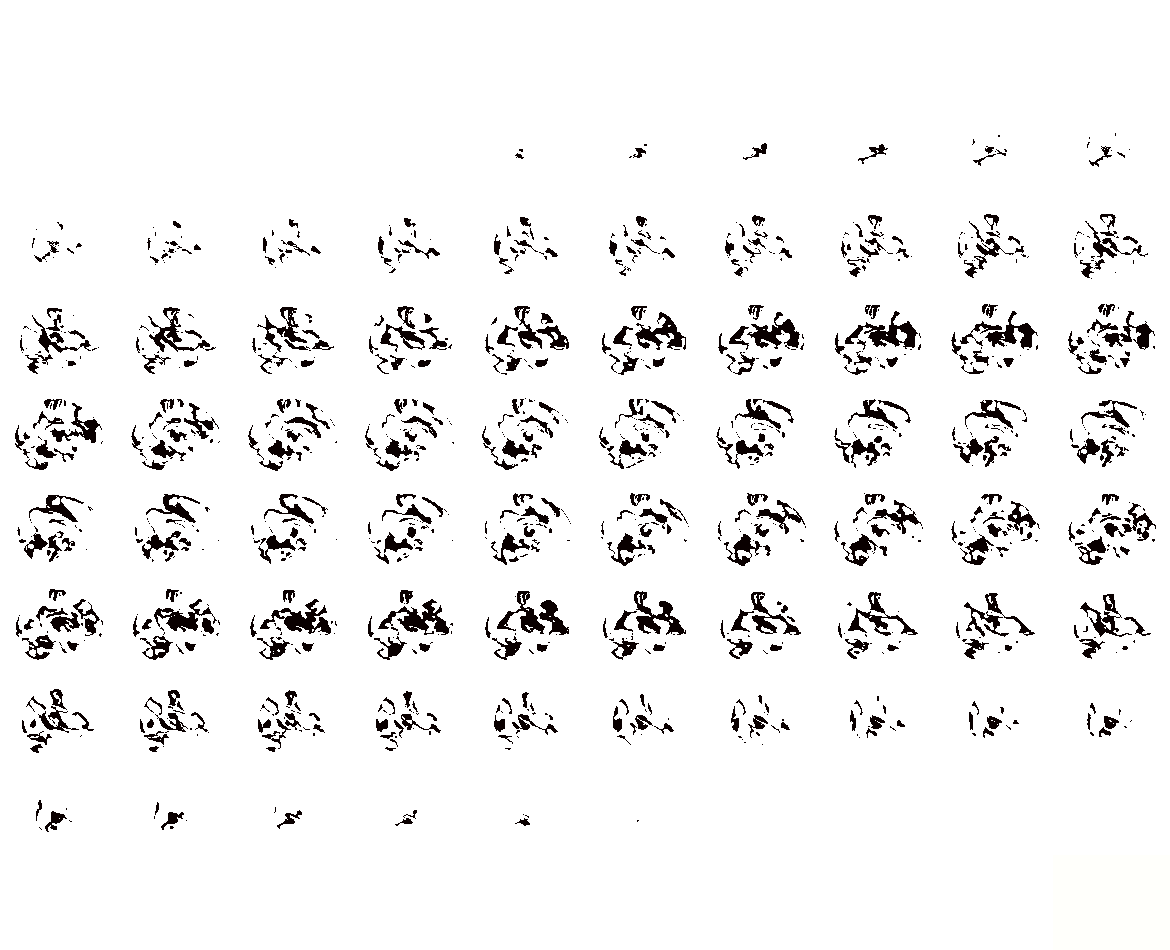

In [ ]:
from calvin_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(p_values_df, (out_dir+'/over_vs_under_65_delta_r_map_p_values_df'))

In [ ]:
merged_df.pop('Patient # CDR, ADAS')
# merged_df.to_csv(os.path.join(out_dir, 'csv_for_delta_r_permutation.csv'))

subject
101      101
102      102
103      103
104      104
105      105
106      106
107      107
108      108
109      109
110      110
111      111
113      113
114      114
115      115
116      116
118      118
119      119
1201    1201
1202    1202
1203    1203
120      120
121      121
122      122
123      123
124      124
125      125
126      126
127      127
128      128
129      129
130      130
131      131
133      133
134      134
135      135
137      137
138      138
139      139
140      140
141      141
142      142
143      143
144      144
145      145
146      146
147      147
Name: Patient # CDR, ADAS, dtype: int64

In [ ]:
merged_df.pop('Patient # CDR, ADAS')
merged_df.to_csv(os.path.join(out_dir, 'csv_for_permuted_delta_r_map.csv'), index=False)